In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import random
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preprocessing

In [2]:
# Reading the dataset file and printing its head to see the data
data = pd.read_csv("Train_data.csv")
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
# Checking data for missing observations
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [4]:
# Checking data types of all columns
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [5]:
# Summary statistics of the dataset
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Checking for number of rows and columns in the dataset.
data.shape

(25192, 42)

In [7]:
# Checking for number of unique values in all columns
unique_counts = data.nunique()

print(unique_counts)

duration                        758
protocol_type                     3
service                          66
flag                             11
src_bytes                      1665
dst_bytes                      3922
land                              2
wrong_fragment                    3
urgent                            2
hot                              22
num_failed_logins                 5
logged_in                         2
num_compromised                  28
root_shell                        2
su_attempted                      3
num_root                         28
num_file_creations               20
num_shells                        2
num_access_files                  7
num_outbound_cmds                 1
is_host_login                     1
is_guest_login                    2
count                           466
srv_count                       414
serror_rate                      70
srv_serror_rate                  56
rerror_rate                      72
srv_rerror_rate             

In [8]:
# Extracting all numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculating summary statistics
statistics = data[numerical_columns].describe()

# Identifying potential outliers using z-score
zscore_threshold = 3
outliers = data[(np.abs(zscore(data[numerical_columns])) > zscore_threshold).any(axis=1)]

# Remove outliers by deleting rows
df_cleaned = data.drop(outliers.index)

In [9]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [10]:
# Check distribution of target column
data['class'].value_counts()

1    13449
0    11743
Name: class, dtype: int64

## Data Modelling

In [11]:
# Separating the target column and features.
X = data.drop(['class'], axis = 1)
y = data['class']

In [12]:
# Split the dataset into training and testing sets, with a ratio of 65% and 35% respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state = 42)

In [13]:
# Set the random seed for NumPy
np.random.seed(42)

# Initializing a random forest classifier and parameters with random values to find the best one
rfc = RandomForestClassifier(random_state = 42)

parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
}

In [14]:
# Performing 5 fold cross validation to find best set of parameters using grid seacr cv
np.random.seed(124)
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [15]:
# Display CV results
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [16]:
# Printing all the parameters and the best one among them. It can be seen that the best parameter is the maximum depth of 16 and
# number of estimators are 50
display(cv)

Best parameters are: {'max_depth': 16, 'n_estimators': 50}


0.948 + or -0.004 for the {'max_depth': 2, 'n_estimators': 5}
0.937 + or -0.011 for the {'max_depth': 2, 'n_estimators': 10}
0.936 + or -0.006 for the {'max_depth': 2, 'n_estimators': 50}
0.945 + or -0.003 for the {'max_depth': 2, 'n_estimators': 100}
0.949 + or -0.002 for the {'max_depth': 2, 'n_estimators': 250}
0.971 + or -0.005 for the {'max_depth': 4, 'n_estimators': 5}
0.975 + or -0.005 for the {'max_depth': 4, 'n_estimators': 10}
0.979 + or -0.003 for the {'max_depth': 4, 'n_estimators': 50}
0.978 + or -0.003 for the {'max_depth': 4, 'n_estimators': 100}
0.977 + or -0.002 for the {'max_depth': 4, 'n_estimators': 250}
0.992 + or -0.002 for the {'max_depth': 8, 'n_estimators': 5}
0.993 + or -0.002 for the {'max_depth': 8, 'n_estimators': 10}
0.994 + or -0.001 for the {'max_depth': 8, 'n_estimators': 50}
0.994 + or -0.001 for the {'max_depth': 8, 'n_estimators': 100}
0.994 + or -0.001 for the {'max_depth': 8, 'n_estimator

In [17]:
#Fit random forest classifier with best parameters
random.seed(124)
clf = RandomForestClassifier(max_depth = 16, 
                             n_estimators = 50)
clf.fit(X_train,
        y_train)
y_pred = clf.predict(X_test)

### Performance Evaluation of Model

In [18]:
# Calculating accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9975051031980041


In [19]:
# Print confusion matrix and classification report.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4059   15]
 [   7 4737]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4074
           1       1.00      1.00      1.00      4744

    accuracy                           1.00      8818
   macro avg       1.00      1.00      1.00      8818
weighted avg       1.00      1.00      1.00      8818



In [20]:
# Check for most important features.
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(max_features='auto', n_jobs=1)

No handles with labels found to put in legend.


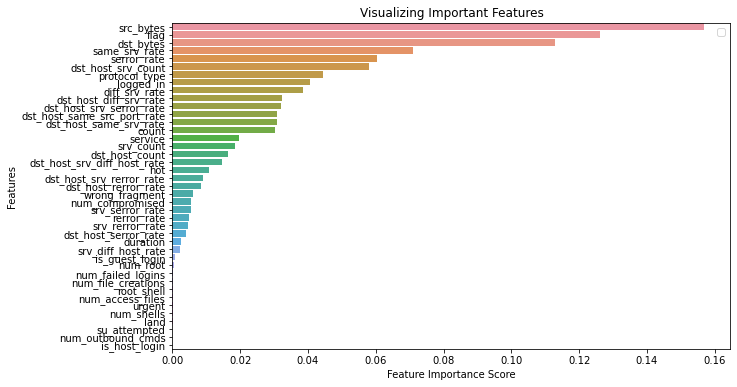

In [21]:
data_temp = data.drop(['class'], axis = 1)
# Show features with their importance value. The higer the value the more important the variable is in estimation of our target
# variable.
feature_imp = pd.Series(clf.feature_importances_, index = data_temp.columns).sort_values(ascending=False)

#Creating a bar plot for features importance.
# Set the figure size
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
#Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [22]:
feature_imp

src_bytes                      0.156807
flag                           0.126224
dst_bytes                      0.112742
same_srv_rate                  0.070852
serror_rate                    0.060353
dst_host_srv_count             0.058070
protocol_type                  0.044412
logged_in                      0.040624
diff_srv_rate                  0.038540
dst_host_diff_srv_rate         0.032388
dst_host_srv_serror_rate       0.032037
dst_host_same_src_port_rate    0.030839
dst_host_same_srv_rate         0.030781
count                          0.030273
service                        0.019756
srv_count                      0.018378
dst_host_count                 0.016345
dst_host_srv_diff_host_rate    0.014631
hot                            0.010801
dst_host_srv_rerror_rate       0.009100
dst_host_rerror_rate           0.008401
wrong_fragment                 0.006139
num_compromised                0.005455
srv_serror_rate                0.005413
rerror_rate                    0.004826


### Cross Validation

In [23]:
# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.99821393 0.99761858 0.99662565 0.99702263 0.99801509]
Mean accuracy: 0.9974991729850556
